In [5]:
#people detection from image using Haar-Cascade classifier

#importing libraries
import numpy as np
import cv2

#loading the image in frame variable using opencv
frame = cv2.imread("D:\\mini5\\Puru_mini_project\\people.jpeg")

#Loading haar cascade classifier in body_classifier variable using opencv
body_classifier = cv2.CascadeClassifier("D:\\mini5\\FaceRecognitionFiles\\haarcascade_fullbody.xml")

#pre-processing the image, converting it to greyscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#detecting bodies from image using classifier (scalefactor[how much image is reduced at each scale], minimum no of neighbours[number of neighbours each candidate should have to retain it])
bodies = body_classifier.detectMultiScale(gray, 1.05, 6)

#bodies 2d array containing only xywh of all the people detected in the image
for (x,y,w,h) in bodies:
    #drawing rectangles around all the detections
    cv2.rectangle(frame, (x, y), (x+w, y+h), (150, 0, 150), 2)

#drawing people count counter on image
cv2.putText(frame, "Count = " + str(len(bodies)), (20,40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
#showing the image
cv2.imshow('Pedestrians', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()    

18


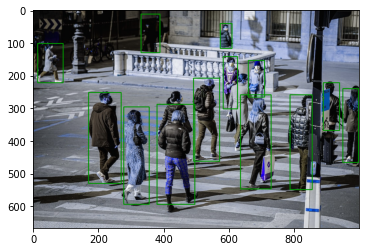

In [6]:
#people detection from image using yolov3 classification model

#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

image = cv2.imread("D:\\mini5\\Puru_mini_project\\people.jpeg")

#reading coco.names for the labels of detectable objects by the model
classes = None
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

Width = image.shape[1]
Height = image.shape[0]

#loading pre-trained model and config file using opencv
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

#preprocessing the image and creating input blob from it 
#set input blob for the network
net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))

# run inference through the network
# and gather predictions from output layers
i = []
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)

#creating lists to store data for each detection in the image
class_ids = []
confidences = []
boxes = []

#create bounding boxes and storing the data from each detection in the image
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

#performing non maximum suppression to eliminate rudundant boxes and detections.
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1) #confthreshold, nmsthreshold

#drawing rectangles on frame for all the people detected in the image.
for i in indices:
    box = boxes[i]
    if class_ids[i]==0:
        label = str(classes[class_id]) 
        cv2.rectangle(image, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 150, 0), 2)

plt.imshow(image)
print(len(indices))

#drawing people count counter on image
cv2.putText(image, "Count = " + str(len(indices)), (20,40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

#showing the image
cv2.imshow('Pedestrians', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#people detection from video using Haar-Cascade classifier

#importing libraries
import numpy as np
import cv2

#Loading video file from location to cap variable
cap = cv2.VideoCapture('people.mp4')

#Loading haar cascade classifier in body_classifier variable using opencv
body_classifier = cv2.CascadeClassifier("D:\\mini5\\FaceRecognitionFiles\\haarcascade_fullbody.xml")

haarresult = []

#Loop for each frame once video is successfully loaded
while cap.isOpened():
    
    #reading frame from video
    ret, frame = cap.read()
    
    #pre-processing the image, converting it to greyscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #detecting bodies from image using classifier
    bodies = body_classifier.detectMultiScale(gray, 1.03, 2)
    
    #bodies 2d array containing only xywh of all the people detected in the image
    for (x,y,w,h) in bodies:
        #drawing rectangles around all the detections
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    #drawing the people count counter
    cv2.putText(frame, "Count =" + str(len(bodies)), (20,40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    
    #storing resulting count
    haarresult.append(len(bodies))
    
    #showing the frame
    cv2.imshow('Pedestrians', frame)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

In [9]:
#people detection from video using yolov3 classification model
classes = None
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# read pre-trained model and config file
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# create input blob 
# set input blob for the network
cap = cv2.VideoCapture("people.mp4")

yoloresult = []

# Loop once video is successfully loaded
while cap.isOpened():
    
    #reading frame from video
    ret, img = cap.read()
    
    #determining new height and width after applying scale factor
    scale_percent = 90 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
  
    #resizing the image
    image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    Width = image.shape[1]
    Height = image.shape[0]
    
    #preprocessing the image and creating input blob from it 
    #set input blob for the network
    net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))

    # run inference through the network
    # and gather predictions from output layers
    i = []
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    outs = net.forward(output_layers)
    
    #creating lists to store data for each detection in the image
    class_ids = []
    confidences = []
    boxes = []

    #create bounding boxes and storing the data from each detection in the image
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.1:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])
    
    #performing non maximum suppression to eliminate rudundant boxes and detections.
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.1)

    #drawing rectangles on frame for all the people detected in the image.
    for i in indices:
        box = boxes[i]
        if class_ids[i]==0:
            label = str(classes[class_id]) 
            cv2.rectangle(image, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 150, 0), 2)
    
    #drawing people count counter on image
    cv2.putText(image, "Count =" + str(len(indices)), (20,40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    
    #storing resulting count
    yoloresult.append(len(indices))
    
    #showing the frame
    cv2.imshow('Pedestrians', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
    
cap.release()
cv2.destroyAllWindows()

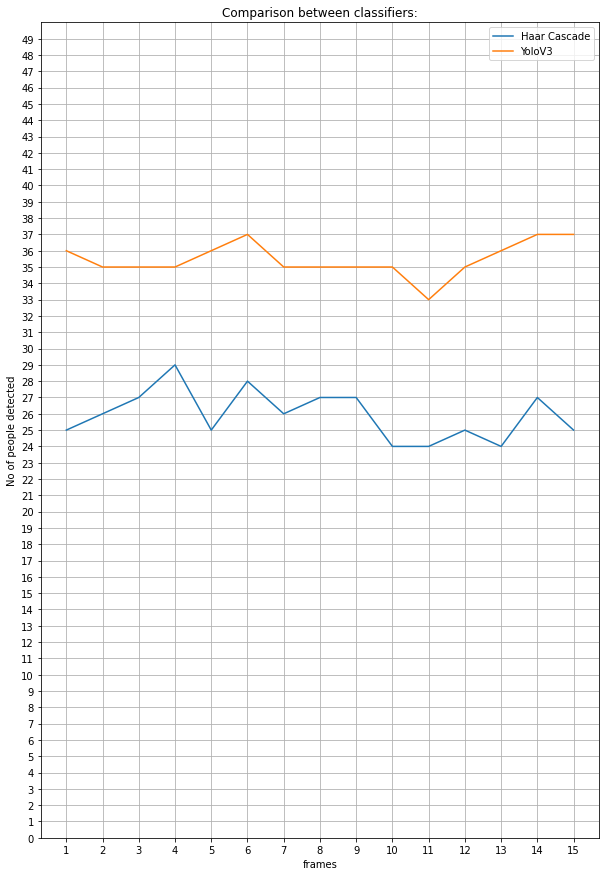

In [118]:
#plotting a comparison graph from video result  

x = []
for i in range(16):
    x.append(i)
x = x[1:]
    
y = []
for i in range(50):
    y.append(i)

#resizing figure size
plt.rcParams['figure.figsize'] = [10, 15]
plt.ylim(0, 50)

#setting ticks for x and y axis
plt.xticks(x)
plt.yticks(y)

#plotting haar cascade result line
plt.plot(x, haarresult[0:15], label = "Haar Cascade")
  
#plotting yolov3 result line
plt.plot(x, yoloresult[0:15], label = "YoloV3")
  
#naming x axis
plt.xlabel('frames')

#naming y axis
plt.ylabel('No of people detected')

#naming the graph
plt.title('Comparison between classifiers:')
  
plt.legend()
plt.grid()
plt.show()